In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import r2_score, confusion_matrix
import matplotlib.patches as mpatches
import time
import datetime
import scipy.fftpack

In [67]:
df = pd.read_csv('Amazon.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.index = df['Date']

In [68]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1997-05-15,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


# Exploratory Data Analysis

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 3179 to 5694
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


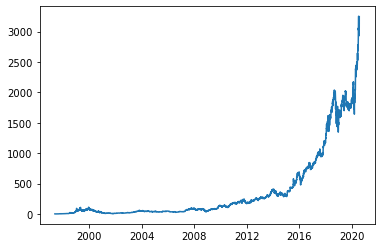

In [30]:
plt.plot(df['Date'], df['Open'])
plt.show()

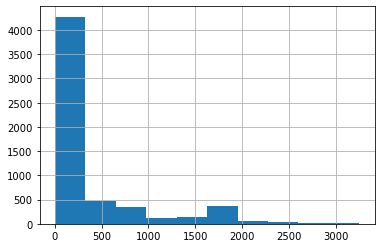

In [31]:
df['Open'].hist()

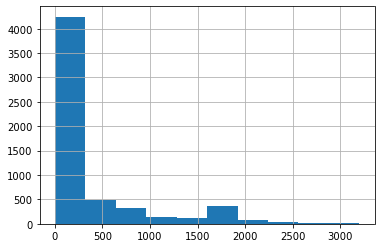

In [32]:
df['Close'].hist()

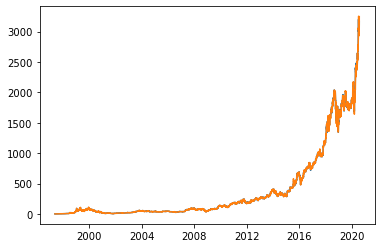

In [33]:
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.show()

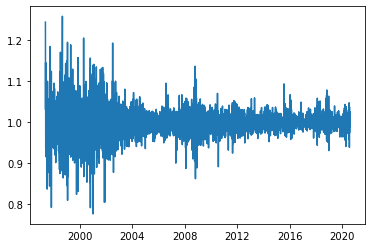

In [34]:
plt.plot(df['Date'], df['Open']/df['Close'])

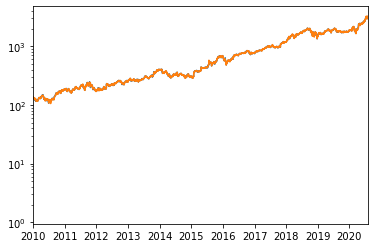

In [35]:
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.xlim([datetime.datetime(2010,1,1),datetime.datetime(2020,7,31)])
plt.yscale('log')
plt.show()

In [36]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,676.391252,682.786188,668.920656,676.207079,676.207079,4.529027e+06
std,580.910946,585.737518,574.697830,580.440707,580.440707,2.857670e+06
min,105.930000,111.290001,105.800003,108.610001,108.610001,8.813000e+05
25%,227.257496,230.859997,224.682507,227.597496,227.597496,2.782700e+06
50%,375.445007,379.154999,373.000000,375.140015,375.140015,3.797400e+06
75%,971.429993,976.155014,961.187485,967.847488,967.847488,5.322375e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,4.242110e+07


In [37]:
df['Open'].isnull().values.any()

False

In [38]:
df.isnull().values.any()

False

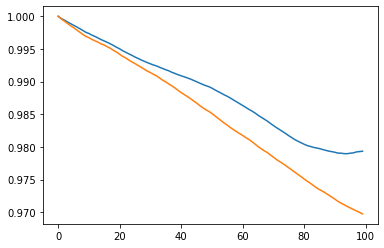

In [39]:
corrs = [ df['Open'].corr(df['Open'].shift(n)) for n in range(100)]
plt.plot(np.array(range(100)), corrs)
corrs2 = [ df1['Open'].corr(df1['Open'].shift(n)) for n in range(100)]
plt.plot(np.array(range(100)), corrs2)

# Creating time-lags

In [73]:
# These are the "time lags"
shifts = np.arange(1, 100).astype(int)
shifted_data = {"lag_{}_day".format(day_shift): df['Open'].shift(day_shift) for day_shift in shifts}
df_shifted = pd.DataFrame(shifted_data)
df_shifted.index = df.index
df_shifted.dropna(inplace=True)

In [74]:
df_shifted.head()

,lag_1_day,lag_2_day,lag_3_day,lag_4_day,lag_5_day,lag_6_day,lag_7_day,lag_8_day,lag_9_day,lag_10_day,...,lag_90_day,lag_91_day,lag_92_day,lag_93_day,lag_94_day,lag_95_day,lag_96_day,lag_97_day,lag_98_day,lag_99_day
Date,,,,,,,,,,,,,,,,,,,,,
1997-10-06,4.083333,4.041667,4.437500,4.000000,4.145833,4.072917,4.343750,4.645833,4.489583,4.000000,...,1.541667,1.625000,1.510417,1.406250,1.437500,1.635417,1.729167,1.760417,1.968750,2.437500
1997-10-07,4.000000,4.083333,4.041667,4.437500,4.000000,4.145833,4.072917,4.343750,4.645833,4.489583,...,1.500000,1.541667,1.625000,1.510417,1.406250,1.437500,1.635417,1.729167,1.760417,1.968750
1997-10-08,4.083333,4.000000,4.083333,4.041667,4.437500,4.000000,4.145833,4.072917,4.343750,4.645833,...,1.510417,1.500000,1.541667,1.625000,1.510417,1.406250,1.437500,1.635417,1.729167,1.760417
1997-10-09,4.145833,4.083333,4.000000,4.083333,4.041667,4.437500,4.000000,4.145833,4.072917,4.343750,...,1.531250,1.510417,1.500000,1.541667,1.625000,1.510417,1.406250,1.437500,1.635417,1.729167
1997-10-10,4.000000,4.145833,4.083333,4.000000,4.083333,4.041667,4.437500,4.000000,4.145833,4.072917,...,1.479167,1.531250,1.510417,1.500000,1.541667,1.625000,1.510417,1.406250,1.437500,1.635417


next we split the dataset into a train and test part. We choose to use the stock price between 2010 and 2019 as a training set and then test it on the 2019 data. The first model we try is the Ridge linear regression model

In [77]:
data_range_train = [datetime.datetime(2010,1, 1), datetime.datetime(2019, 1, 1)]
data_range_test = [datetime.datetime(2019,1, 1), datetime.datetime(2020, 1, 1)]

X_train = df_shifted[data_range_train[0] : data_range_train[1]].values
y_train = df['Open'][data_range_train[0] : data_range_train[1]].values

X_test = df_shifted[data_range_test[0] : data_range_test[1]].values
y_test = df['Open'][data_range_test[0] : data_range_test[1]].values



In [48]:
 from sklearn.linear_model import Ridge

In [78]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [79]:
y_pred = model.predict(X_test)

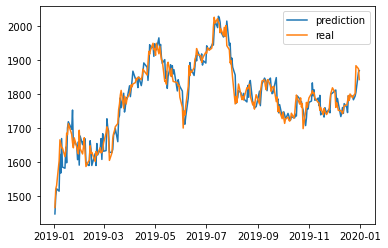

In [83]:
fig, ax = plt.subplots()
dates = df['Date'][data_range_test[0] : data_range_test[1]]
ax.plot(dates, y_pred, label = "prediction")
ax.plot(dates, y_test, label = "real")
ax.legend()
plt.show()

let's see how often the model was correctly predicting an increase in price. We can use the `numpy.diff` function to calculate the difference between sequential dates. By mapping this to positive/negative values, we can then use the `sklearn.metrics.confusion_matrix` function to compute the confusion matrix.

In [92]:
y_pred_diff = np.diff(y_pred) > 0
y_test_diff = np.diff(y_test) > 0
c_mat = confusion_matrix(y_pred_diff, y_test_diff)/len(y_pred_diff)
print(c_mat)
print(c_mat[0,0]+c_mat[1,1])
print(c_mat[0,1]+c_mat[1,0])



[[0.2310757  0.24302789]
 [0.23904382 0.28685259]]
0.5179282868525896
0.4820717131474104


In [ ]:
y_pred = pd.DataFrame({'y': model.predict(X_test1) })
y_pred.index = X_test1.index

In [ ]:
y

In [ ]:
fig, ax = plt.subplots()
y_test.plot(ax=ax, label = "test")
y_pred.plot(ax=ax, label = "pred")
fig.legend()
plt.show()

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
y_test

# fourier transform

In [ ]:
df['Open']

In [ ]:
df_interpolate = df.set_index('Date').resample('1D').mean().interpolate('linear')


In [ ]:
np.seterr(divide='ignore')

fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [1.5, 1]}, figsize = (8,2*1.7))

N = 1000
dt = 50/N

x = np.linspace(0,N*dt,N)
y = np.sin(2*np.pi*x/3) + 1*np.sin(2*np.pi*x/5)

axs[0].plot(x, y, label = "$\sin2\pi t/3+\sin2\pi t/5$")

axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("signal")

yf = scipy.fftpack.fft(y)[:int(N/2)]
xf = np.linspace(0.0, 1/(2.0*dt), int(N/2))
axs[1].plot(1/xf, np.abs(yf))
axs[1].scatter(1/xf, np.abs(yf))

axs[1].set_xlim(0,10)
axs[1].set_xlabel("1/freq [s]")
axs[1].set_ylabel(" fft(signal) [a.u]")
axs[1].axvline(3, ls="-.", color="0")
axs[1].axvline(5, ls="-.", color="0")


plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
np.seterr(divide='ignore')

fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [1.5, 1]}, figsize = (8,2*1.7))

N = 1000
dt = 50/N

x = df_interpolate.index
y = df_interpolate['Open'].values

N = len(x)
dt = 1

axs[0].plot(x, y, label = "Amazon Stock Open")

axs[0].set_xlabel("Date [YYYY-MM]")

yf = scipy.fftpack.fft(y)[:int(N/2)]
xf = np.linspace(0.0, 1/(2.0*dt), int(N/2))
axs[1].plot(xf, np.abs(yf))
axs[1].scatter(xf, np.abs(yf))

# axs[1].set_xlim([0,50])
# axs[1].set_ylim([0,50000])
# axs[1].relim()
# axs[1].autoscale(axis='y')
axs[1].set_xlabel("1/freq [day]")
axs[1].set_ylabel(" fft(signal) [a.u]")
# axs[1].set_yscale('log')

plt.legend()

plt.tight_layout()
plt.show()